<a href="https://colab.research.google.com/github/Thiag-0/Redes-Neurais-Python/blob/main/Redes_Neurais_Thiago_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOME : THIAGO AUGUSTO DA SILVA LIMA**

# Lista de Exercícios Práticos - Introdução às Redes Neurais

## Exercício 1


Implemente uma rede neural simples para resolver um problema de classificação utilizando o **Pima Indians Diabetes Dataset**. Esta base de dados apresenta em registros de exames de pacientes e tem como objetivo diagnosticar se um determinado paciente tem diabetes. Mais detalhes sobre a base: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


1. Divida o dataset em conjuntos de treino e teste.
2. Normalize os dados para o intervalo [0, 1].
3. Crie uma rede neural com:
   - Uma camada oculta de 16 neurônios e ativação ReLU.
   - Uma camada de saída com ativação sigmoide.
4. Treine a rede por 50 épocas e avalie sua precisão.


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar dataset e preparar os dados
data = load_diabetes()
X, y = data.data, data.target
y = (y > y.mean()).astype(int)  # Classificação binária: acima da média (1) ou abaixo (0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construção da rede neural
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss no conjunto de teste: {loss:.4f}")
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

# Fazer previsões
y_pred = (model.predict(X_test) > 0.5).astype(int)
final_accuracy = np.mean(y_pred.flatten() == y_test)
print(f"Acurácia calculada manualmente: {final_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3813 - loss: 0.9868 - val_accuracy: 0.3099 - val_loss: 0.9840
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4252 - loss: 0.9098 - val_accuracy: 0.3099 - val_loss: 0.9421
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3905 - loss: 0.9063 - val_accuracy: 0.3099 - val_loss: 0.9045
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3957 - loss: 0.8555 - val_accuracy: 0.3099 - val_loss: 0.8724
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4174 - loss: 0.7991 - val_accuracy: 0.3380 - val_loss: 0.8445
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4428 - loss: 0.7785 - val_accuracy: 0.3380 - val_loss: 0.8200
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4702 - loss: 0.7441 - val_accuracy: 0.3380 - val_loss: 0.7998
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4942 - loss: 0.7231 - val_accuracy: 0.3521 - val_loss: 0.7819
Epoch 9

## Exercício 2


Treine uma rede neural para reconhecer dígitos escritos à mão usando a base de dados **MNIST**. https://www.kaggle.com/datasets/hojjatk/mnist-dataset

1. Carregue e visualize o dataset MNIST.
2. Pré-processe os dados (normalize as entradas e transforme os rótulos em *one-hot encoding*).
3. Crie uma rede com:
   - Entrada: 784 neurônios (28x28 pixels achatados).
   - Oculta: 64 neurônios com ativação ReLU.
   - Saída: 10 neurônios com ativação softmax.
4. Treine a rede por 10 épocas e avalie a acurácia no conjunto de teste.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


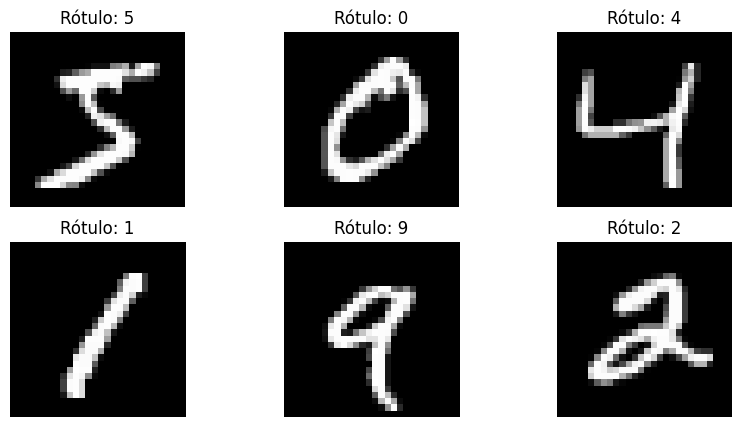

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8447 - loss: 0.5549 - val_accuracy: 0.9449 - val_loss: 0.1969
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9470 - loss: 0.1833 - val_accuracy: 0.9583 - val_loss: 0.1438
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9600 - loss: 0.1323 - val_accuracy: 0.9633 - val_loss: 0.1252
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9693 - loss: 0.1034 - val_accuracy: 0.9667 - val_loss: 0.1145
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9769 - loss: 0.0785 - val_accuracy: 0.9668 - val_loss: 0.1095
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9813 - loss: 0.0653 - val_accuracy: 0.9714 - val_loss: 0.1009
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0550 - val_accuracy: 0.9707 - val_loss: 0.1031
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9868 - loss: 0.0474 - 

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Carregar o dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualizar algumas imagens
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Rótulo: {y_train[i]}")
    plt.axis('off')
plt.show()

# Pré-processamento
X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Construção da rede neural
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compilação do modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss no conjunto de teste: {loss:.4f}")
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")


## Exercício 3


Implemente uma rede neural para prever valores contínuos utilizando o **Boston Housing Dataset**. https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

1. Carregue o dataset Boston Housing.
2. Normalize os dados de entrada.
3. Crie uma rede com:
   - Camada de entrada: 13 neurônios.
   - Camada oculta: 32 neurônios com ativação ReLU.
   - Camada de saída: 1 neurônio.
4. Treine o modelo e avalie o erro quadrático médio (MSE) no conjunto de teste.

Dica: a biblioteca sci-kit learn possui um módulo de métricas de erro. Dentre as disponíveis, está o MSE. https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_squared_error.html


In [5]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Carregar o dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construção da rede neural
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)  # Saída com um neurônio para prever valores contínuos
])

# Compilação do modelo
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Avaliação do modelo
loss, mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss no conjunto de teste: {loss:.4f}")
print(f"MSE no conjunto de teste: {mse:.4f}")

# Previsões e cálculo do MSE
y_pred = model.predict(X_test)
mse_manual = mean_squared_error(y_test, y_pred)
print(f"MSE calculado manualmente: {mse_manual:.4f}")


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 590.6953 - mse: 590.6953 - val_loss: 619.7592 - val_mse: 619.7592
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 553.0490 - mse: 553.0490 - val_loss: 594.3633 - val_mse: 594.3633
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 501.2275 - mse: 501.2275 - val_loss: 567.4942 - val_mse: 567.4942
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 533.9467 - mse: 533.9467 - val_loss: 539.9077 - val_mse: 539.9077
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 461.4696 - mse: 461.4696 - val_loss: 510.3145 - val_mse: 510.3145
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 449.1105 - mse: 449.1105 - val_loss: 479.3032 - val_mse: 479.3032
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 404.6401 - mse: 404.6401 - val_loss: 446.0641 - val_mse: 446.0641
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 403.9621 - mse: 403.9621 - val_loss: 411.0808 - val_mse: 411.0808
Epoch 9/50
21/21 

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MSE calculado manualmente: 33.1530
